<a href="https://colab.research.google.com/github/mokshitagupta/cse216-analysis/blob/main/Instagram_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from time import sleep
! pip3 install app-store-scraper
! pip3 install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import json

# from app_store_scraper import AppStore
# tiktok = AppStore(country='us', app_name='bereal', app_id = '1459645446')

# tiktok.review(how_many=2000, sleep=0.01)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requ

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
tiktokdf2 = pd.read_json('reviews_insta.json')
tiktokdf2 =  tiktokdf2.rename(columns={"score": "rating", "text": "review"})
tiktokdf2.head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias
0,5c32a413-2580-4850-b329-c413530bbe04,Sardorbek Iqboljonov,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-12-10 07:14:32.982000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Hii Instagram 👋🏻 app is very good but have som...,NaN,NaN,359.2.0.64.89,127,[]
1,090858ea-e6fd-4a97-80cd-08fd5409d771,Md Abid,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-12-10 13:51:08.870000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"1. User Interface (UI): How intuitive, clean, ...",NaN,NaN,359.0.0.59.89,58,[]
2,5b9f8e85-db6f-463d-a611-ca2a360f6670,Daniel David,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-28 15:48:44.225000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"""I'm absolutely loving Instagram! The app is s...",NaN,NaN,359.0.0.59.89,978,[]
3,6d9181c3-4aed-400f-831f-dea770d9e9ac,Absul awal Abdul awal nk,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-06 12:17:28.258000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,It is a beautiful and good app but a small fee...,NaN,NaN,354.2.0.47.100,26850,[]
4,8c9d5e30-50f0-4633-b6aa-c589a457048d,Hlulani Chauke,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-09-22 03:30:42.481000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Instagram is like my personal creative hub! Fr...,NaN,NaN,349.3.0.42.104,8715,"[{'criteria': 'vaf_mark_message_as_read', 'rat..."


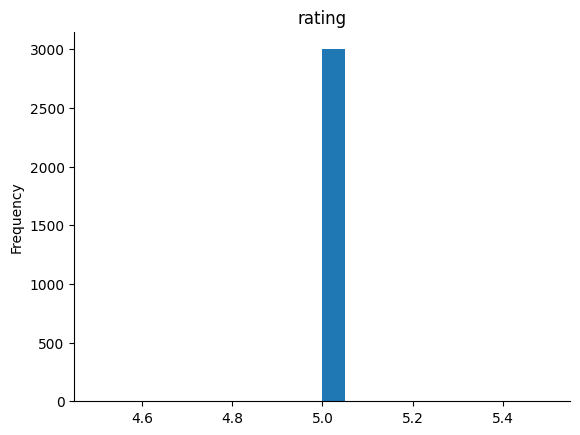

In [ ]:
# @title rating

from matplotlib import pyplot as plt
tiktokdf2['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tiktokdf2.to_csv("data.csv")

In [ ]:
words_to_check = ['other','tiktok shop','ecommerce']
mask = [word in words_to_check for word in tiktokdf2['review'] ]
# print(mask)
tiktokdf2[mask].head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias


In [ ]:
sia = SentimentIntensityAnalyzer()
tiktokdf2['sentiment'] = tiktokdf2['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

tiktokdf2['theme'] = tiktokdf2['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')
tiktokdf2.head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias,sentiment,theme
0,5c32a413-2580-4850-b329-c413530bbe04,Sardorbek Iqboljonov,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-12-10 07:14:32.982000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Hii Instagram 👋🏻 app is very good but have som...,NaN,NaN,359.2.0.64.89,127,[],0.8250,Positive
1,090858ea-e6fd-4a97-80cd-08fd5409d771,Md Abid,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-12-10 13:51:08.870000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"1. User Interface (UI): How intuitive, clean, ...",NaN,NaN,359.0.0.59.89,58,[],0.9531,Positive
2,5b9f8e85-db6f-463d-a611-ca2a360f6670,Daniel David,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-28 15:48:44.225000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"""I'm absolutely loving Instagram! The app is s...",NaN,NaN,359.0.0.59.89,978,[],0.9928,Positive
3,6d9181c3-4aed-400f-831f-dea770d9e9ac,Absul awal Abdul awal nk,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-06 12:17:28.258000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,It is a beautiful and good app but a small fee...,NaN,NaN,354.2.0.47.100,26850,[],0.9864,Positive
4,8c9d5e30-50f0-4633-b6aa-c589a457048d,Hlulani Chauke,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-09-22 03:30:42.481000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,Instagram is like my personal creative hub! Fr...,NaN,NaN,349.3.0.42.104,8715,"[{'criteria': 'vaf_mark_message_as_read', 'rat...",0.9918,Positive


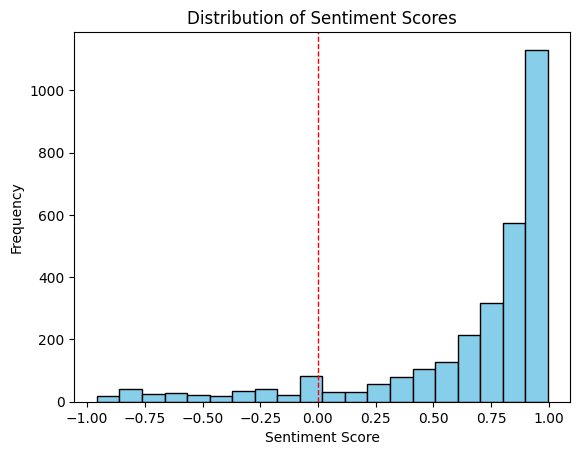

In [ ]:
plt.hist(tiktokdf2['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Add a vertical line at 0
plt.show()

<ipython-input-8-dc73b1641908>:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-8-dc73b1641908>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-8-dc73b1641908>:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-8-dc73b1641908>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

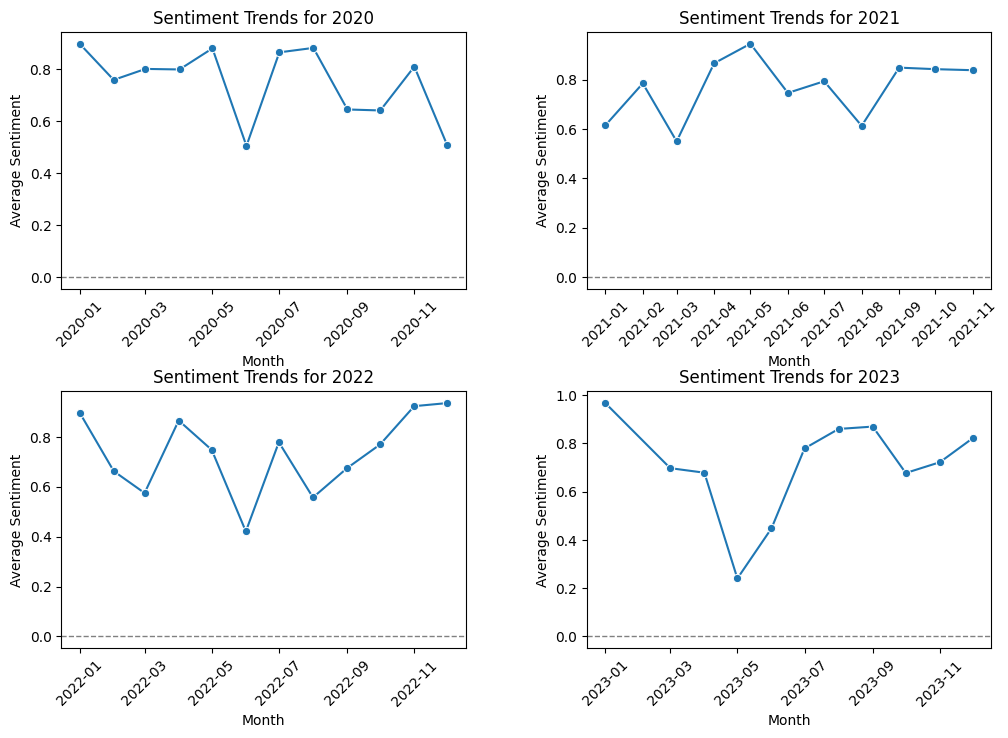

In [ ]:
import numpy as np

# Plot
import seaborn as sns
# Convert 'date' column to datetime
tiktokdf2['date'] = pd.to_datetime(tiktokdf2['date'])

# Define the range of years to plot
start_year = 2020
end_year = 2024
years = range(start_year, end_year )

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharex=False)
axes = axes.flatten()

for i, year in enumerate(years):
    # Filter data for the current year
    df_year = tiktokdf2[tiktokdf2['date'].dt.year == year]

    # Group by month and calculate average sentiment
    df_year['month'] = df_year['date'].dt.to_period('M')
    sentiment_trends = df_year.groupby('month')['sentiment'].mean().reset_index()
    sentiment_trends['month'] = sentiment_trends['month'].dt.to_timestamp()

    # Plot sentiment trends for the current year
    sns.lineplot(x='month', y='sentiment', data=sentiment_trends, marker='o', ax=axes[i])
    axes[i].set_title(f'Sentiment Trends for {year}')
    axes[i].axhline(0, color='gray', linestyle='dashed', linewidth=1)  # Reference line at 0
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Sentiment')

# Adjust layout
plt.subplots_adjust(hspace=0.4, wspace=0.3)# plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert text to vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tiktokdf2['review'])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
tiktokdf2['cluster'] = kmeans.fit_predict(X)

# Analyze cluster themes
for cluster in set(tiktokdf2['cluster']):
    print(f"Cluster {cluster}:")
    print(tiktokdf2[tiktokdf2['cluster'] == cluster]['review'].head())


Cluster 0:
0     Hii Instagram 👋🏻 app is very good but have som...
9     It's really nice as it allows you to download ...
10    Okay, i do enjoy this app very much, but idk i...
11    It sounds like you're asking about creating or...
12    A lot of work went into this application and u...
Name: review, dtype: object
Cluster 1:
1    1. User Interface (UI): How intuitive, clean, ...
2    "I'm absolutely loving Instagram! The app is s...
3    It is a beautiful and good app but a small fee...
4    Instagram is like my personal creative hub! Fr...
5    I absolutely love Instagram! The user-friendly...
Name: review, dtype: object
Cluster 2:
14    I wish they would take the reels feature away....
46    This is the best app I have ever used......I j...
57    This app is really great, but you have to use ...
66    Since the day I started using Instagram, I jus...
74    This app is awesome. I stayed away from this a...
Name: review, dtype: object


<ipython-input-10-5bba0ace221b>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tiktokdf2['year_month'] = tiktokdf2['date'].dt.to_period('M')


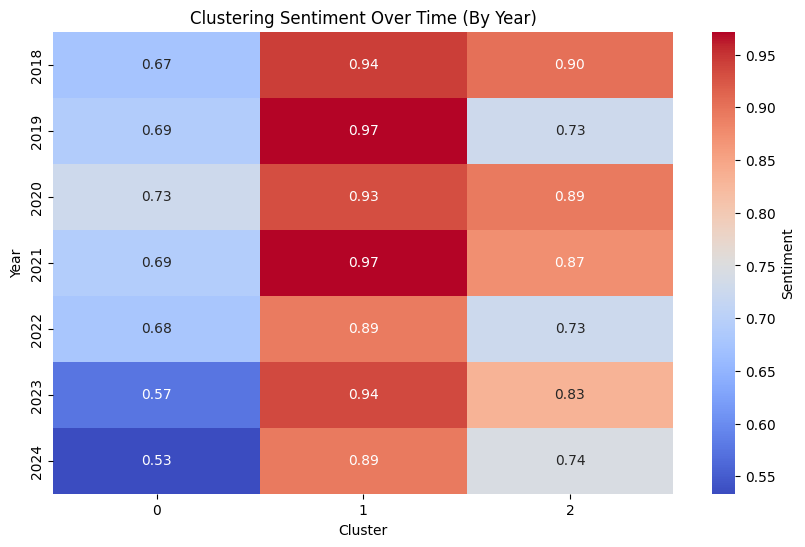

In [ ]:
# Extract the year-month from the date
tiktokdf2['year_month'] = tiktokdf2['date'].dt.to_period('M')
tiktokdf2['year'] = tiktokdf2['date'].dt.year

df_pivot = tiktokdf2.pivot_table(index='year', columns='cluster', values='sentiment', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Sentiment'})
plt.title('Clustering Sentiment Over Time (By Year)')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()


In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt_tab')
nltk.download('stopwords')


def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase to standardize
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

tiktokdf2['tokens'] = tiktokdf2['review'].apply(tokenize_text)

# Create a dictionary and corpus
texts = tiktokdf2['tokens'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

n= 7

# Train LDA model
lda = LdaModel(corpus, num_topics=n, id2word=dictionary, passes=15)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Print themes
for idx, topic in lda.show_topics(num_topics=n, num_words=150, formatted=False):
    print(f"Topic {idx}: {[word for word, _ in topic]}")

Topic 0: ['instagram', 'content', 'platform', 'users', 'features', 'community', 'interface', 'sharing', 'user', 'tools', 'stories', 'engaging', 'making', '’', 'user-friendly', 'creativity', 'visually', 'like', 'connect', 'easy', 'visual', 'intuitive', 'audience', 'photos', 'expression', 'ability', '``', 'interests', 'offers', 'personal', "'s", 'videos', 'however', 'creative', 'reels', 'excellent', 'make', 'experience', 'share', 'audio', 'business', 'social', 'new', 'popular', 'reply', 'navigate', 'allows', 'range', 'powerful', 'enhance', 'others', 'team', "''", 'discovering', 'appealing', 'storytelling', 'engage', 'showcase', 'connecting', 'media', 'filters', 'perfect', 'engagement', 'friend', 'makes', 'information', 'hashtags', 'great', 'space', 'discover', 'diverse', 'shared', 'video', 'direct', 'reach', 'return', 'sense', 'application', 'inspiring', 'updates', 'trends', 'reaction', 'express', 'box', 'marketing', 'like-minded', 'wide', "'ve", 'starting', 'connects', 'blank', 'india',

{'design': 0.01394669653293521, 'interface': -3.2886369963864215e-05, 'ui': 2.102821113513557e-31, 'intuitive': 0.00018562110367892874, 'clean': 0.10433801460515557, 'smooth': 0.010529327396287378, 'visual': 0.0008128606756673001, 'user-friendly': -0.0042589204072516, 'feedback': 1.2891910458960276e-05, 'help': 8.659829796411184e-39, 'look': -3.4234289229949057e-13, 'aesthetic': 0.06969133395957036, 'color scheme': 0.8765, 'minimalist': 0.8765, 'scrolling': -5.877144626551182e-11, 'click': -4.063358731811278e-08, 'customization': 0.630230332728, 'tap': 5.020178469159307e-09, 'consistency': 0.548833747584, 'frustrating': 3.797125729254443e-08, 'usability': 0.8202, 'organized': 0.24678514288193681, 'dark mode': -1.49660541612657e-05, 'themes': 0.5702122195014095, 'swipe': 0.010887571598004929, 'modern': 0.5789638818006739, 'loading': 7.08074343866005e-15, 'navigation': 0.862770448190912, 'drop': -2.2639296802645826e-05, 'layout': 0.023339312397882558, 'drag': 0.15066870732667398, 'stream

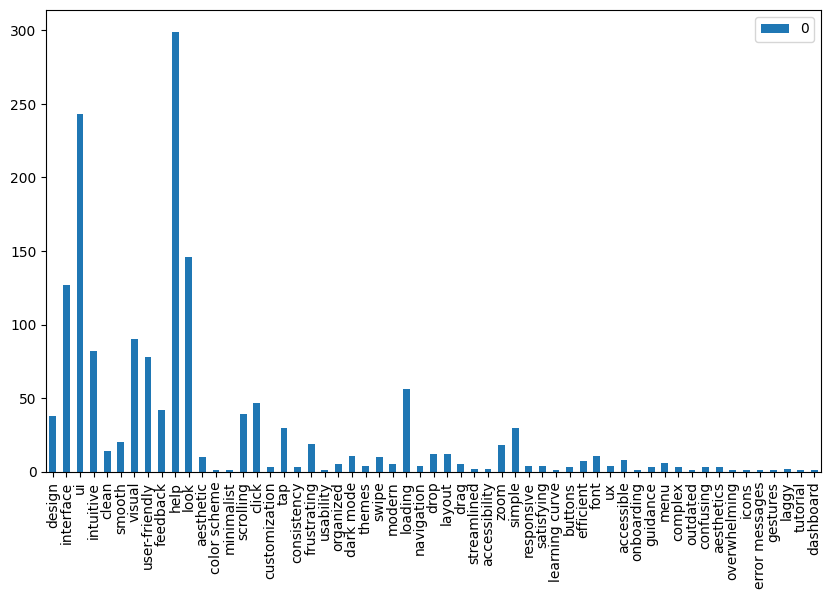

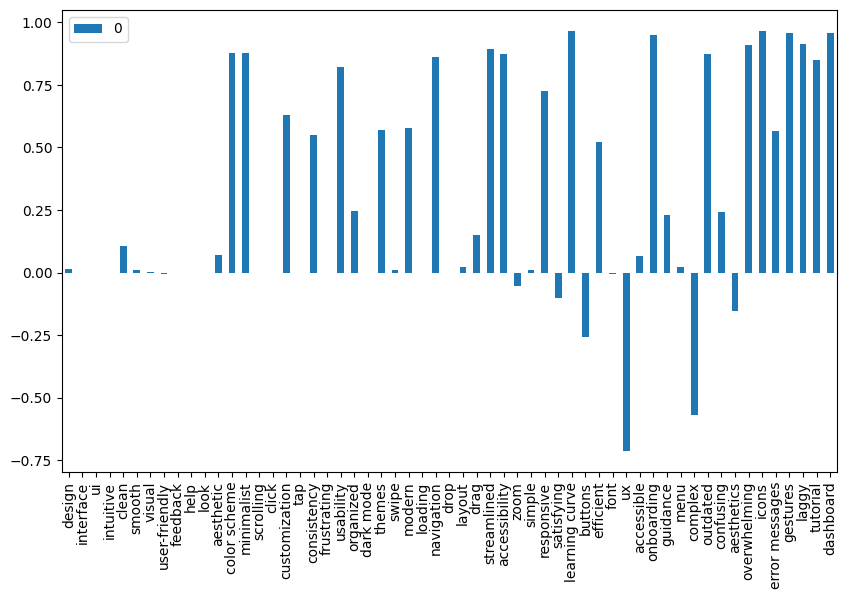

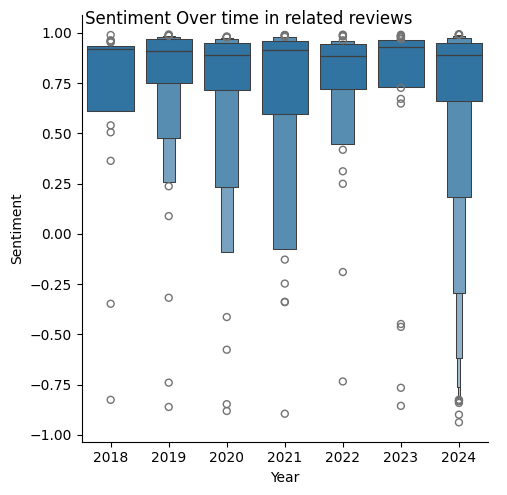

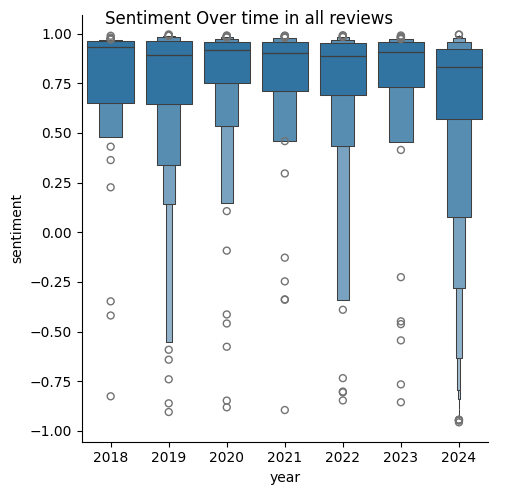

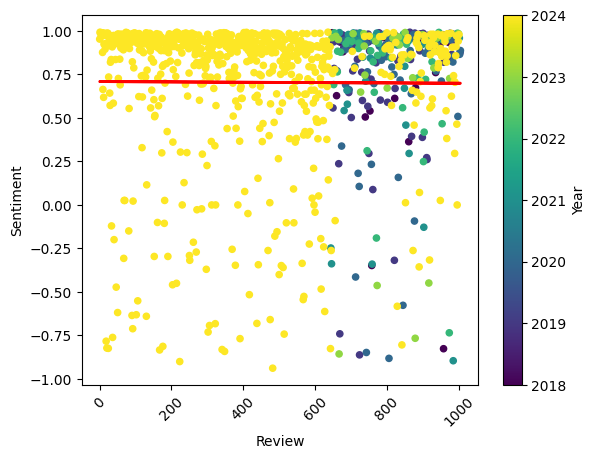

In [ ]:
from nltk.text import Text
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


plt.show()

keywords = [
    "design", "interface", "look", "layout", "aesthetic", "ui", "ux",
    "animations", "gestures", "aesthetics", "navigation", "intuitive",
    "accessibility", "accessible", "usability", "user-friendly",
    "clean", "cluttered", "organized", "confusing", "simple", "complex",
    "modern", "outdated", "responsive", "sluggish", "smooth", "laggy",
    "color scheme", "typography", "font", "readability", "legible",
    "buttons", "icons", "menu", "sidebar", "dashboard", "scrolling",
    "zoom", "pinch", "swipe", "tap", "drag", "drop", "click",
    "feedback", "visual cues", "loading", "error messages",
    "customization", "personalization", "themes", "dark mode",
    "consistency", "coherent", "intuitive", "learning curve",
    "onboarding", "tutorial", "help", "guidance","maximalist",
    "minimalist", "feature-rich", "overwhelming", "streamlined",
    "efficient", "time-consuming", "frustrating", "satisfying", "visual", "visualy"
]

# Flatten the list of tokens across all rows
all_tokens = [word for tokens in tiktokdf2['tokens'] for word in tokens]

# Join all tokens into a single string
text = Text(all_tokens)

hits = {}

senti = {}

# newdf = tiktokdf2.copy()
# Now you can call the concordance function
frq = {}
sentsp = {}
for (review, sent, yr) in zip(tiktokdf2.review, tiktokdf2.sentiment, tiktokdf2.year):
  for k in keywords:
    if k in review.lower():
      frq[k] = frq.get(k, 0) + 1
      hits[(review, sent, yr)] = hits.get((review, sent, yr), 0) + 1
      senti[review] = senti.get(review, []) + [k]
      if sent != 0:
        sentsp[k] = sentsp.get(k, 1) * sent
        # print(k, sent, sentsp[k])

# print(len(list(filter(lambda x: x is not None, sentsp))), len(sentsp))
mat = [[0 for _ in range(len(keywords))] for _ in range(len(senti))]
# print(senti.keys())
for i, entry in list(enumerate(senti.items())):
  for wd in entry[1]:
    mat[i][keywords.index(wd)] = 1

print(sentsp)
df = pd.DataFrame.from_dict(frq, orient='index')
# plt.xticks(rotation=45)
# plt.figure(figsize=(8,8))
df.plot(kind='bar', figsize=(10, 6))
df = pd.DataFrame.from_dict(sentsp, orient='index')
# plt.xticks(rotation=45)
df.plot(kind='bar', figsize=(10, 6))
  # for key in entry[1
      # print(review)
  # hits += len(text.concordance_list(key))
  # for i in text.concordance_list(key):
  #   print(i)
  # print(len(text.concordance_list(key)))
# # print(hits.values())
# years = list(set([x[2] for x in hits.keys()]))
df = pd.DataFrame(
    [(i, int(entry[0][2]),entry[0][1], entry[1]) for (i, entry) in list(enumerate(hits.items())) ],
    columns=["Review", "Year", "Sentiment", "Count"]
)
# # senti = [[0 for _ in range(len(keywords))] for _ in range(len(years))]

# # for i, row in df.iterrows():
# #   senti[years.index(row["Year"])][keywords.index(row["k"])] = row["Sentiment"



# print(df.head(), years)
g = sns.catplot(data=df, x="Year", y="Sentiment", kind="boxen")
g.fig.suptitle("Sentiment Over time in related reviews")
g2 = sns.catplot(data=tiktokdf2, x="year", y="sentiment", kind="boxen")
g2.fig.suptitle("Sentiment Over time in all reviews")

# comment_words = ' '
# stopwords = set(STOPWORDS)

# iterate through the csv file
# for val in df.review:

#    # typecaste each val to string
#    val = str(val)

#    # split the value
#    tokens = val.split()

# # Converts each token into lowercase
# for i in range(len(tokens)):
#     tokens[i] = tokens[i].lower()

# for words in tokens:
#     comment_words = comment_words + words + ' '


# wordcloud = WordCloud(width = 800, height = 800,
#             background_color ='white',
#             stopwords = stopwords,
#             min_font_size = 10).generate(comment_words)

# plot the WordCloud image
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

df = df.sort_values(by="Year")
ax2 = df.plot.scatter(x='Review',
                      y='Sentiment',
                      c='Year',
                      colormap="viridis")
plt.xticks(rotation=45)


import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X, Y = np.array(df.Review).reshape(-1,1), np.array(df.Sentiment).reshape(-1,1)
plt.plot( X, LinearRegression().fit(X, Y).predict(X), color="red",linewidth=2)
plt.show()



# for i, r in df.iterrows():
#   # print(r["Sentiment"],r, years.index(r["Year"]), len(senti), years)
#   senti[years.index(r["Year"])].append((r["Review"], r["Sentiment"]))

# # print(df["Sentiment"].describe())
# print(years)
# for i in senti: print(len(i))

# glue = df.pivot(index="Review", columns="Year", values="Sentiment")
# sns.heatmap(glue)

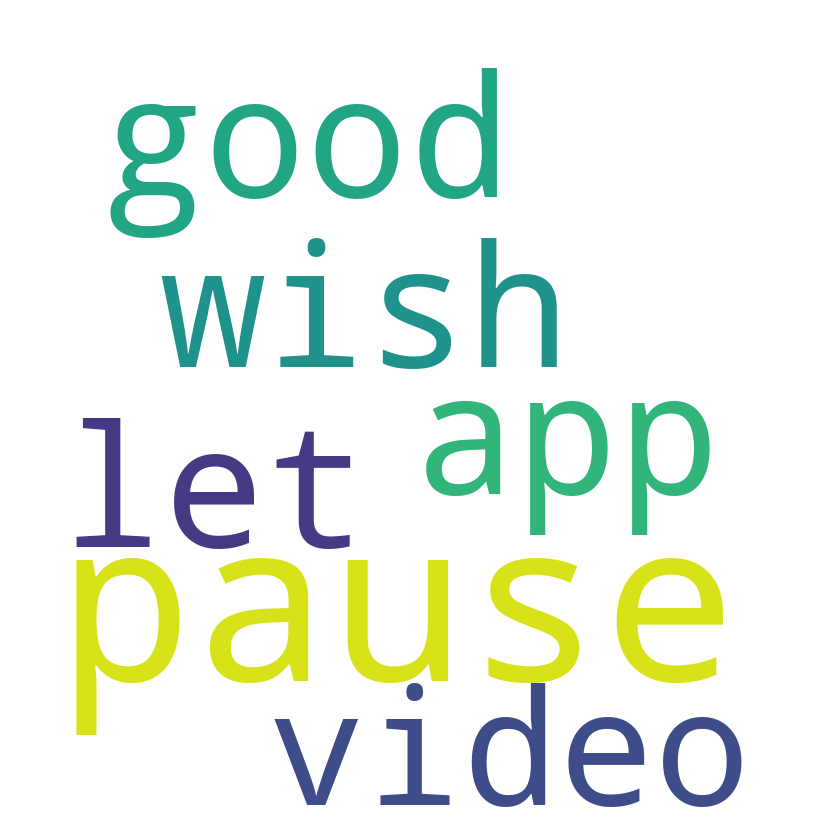

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tiktokdf2.review:

   # typecaste each val to string
   val = str(val)

   # split the value
   tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens:
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
ser = pd.Series(' '.join(tiktokdf2['review']).lower().split()).value_counts()[:10]
ser

,count
and,4655
the,4332
i,4153
to,4112
a,2650
it,2436
is,2356
for,1702
my,1643
this,1642


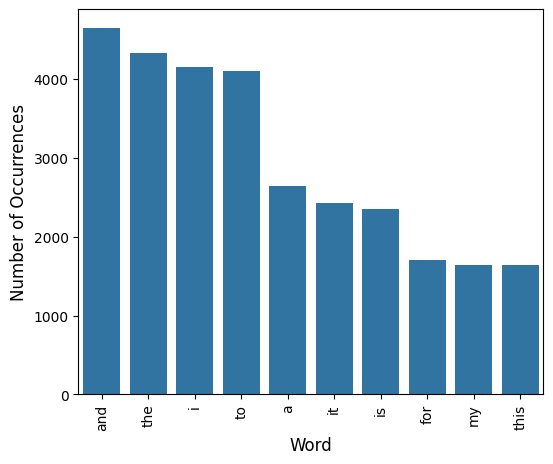

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=ser.index, y=ser.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.xaxis.set_tick_params(rotation=90)